In [4]:
import pandas as pd


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ast
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor





In [6]:
# Load the data
data = pd.read_csv('Project 2_data.csv')
# data

In [7]:
# Remove specified columns
columns_to_drop = ['id', 'homepage', 'original_title', 'overview', 'poster_path', 'spoken_languages', 'tagline', 'Keywords']
data.drop(columns=columns_to_drop, inplace=True)
# data

In [8]:
# Filter rows where 'status' are 'Released'
data = data[data['status'] == 'Released']
# data

In [9]:
# Change 'release_date' into columns of month and year
data['release_month'] = pd.to_datetime(data['release_date']).dt.month
data['release_year'] = pd.to_datetime(data['release_date']).dt.year
data.drop(columns=['release_date'], inplace=True)
# data

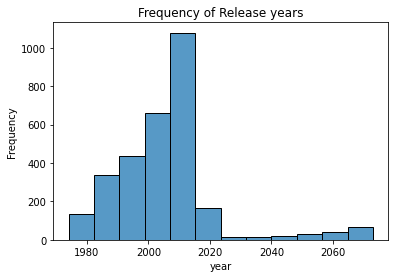

In [10]:
release_year = data['release_year']
sns.histplot(data['release_year'], bins=12, kde=False)
plt.title("Frequency of Release years")
plt.xlabel("year")
plt.ylabel("Frequency")
plt.show()

In [11]:
data = data[data['release_year'] < 2025]
# data

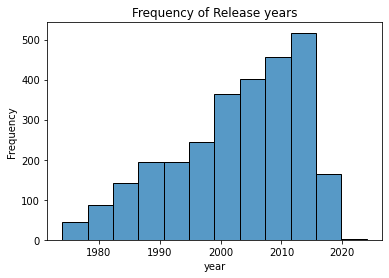

In [12]:
release_year = data['release_year']
sns.histplot(data['release_year'], bins=12, kde=False)
plt.title("Frequency of Release years")
plt.xlabel("year")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Set 'imdb_id' as primary key
data.set_index('imdb_id', inplace=True)
# data

In [14]:
# Convert 'original_language' to full form
language_map = {'en': 'English','hi': 'Hindi','ko': 'Korean','sr': 'Serbian','fr': 'French','it': 'Italian',
                'nl': 'Dutch','zh': 'Chinese','es': 'Spanish','cs': 'Czech','ta': 'Tamil','cn': 'Cantonese',
                'ru': 'Russian','tr': 'Turkish','ja': 'Japanese','fa': 'Persian','sv': 'Swedish','de': 'German',
                'te': 'Telugu','pt': 'Portuguese','mr': 'Marathi','da': 'Danish','fi': 'Finnish','el': 'Greek',
                'ur': 'Urdu','he': 'Hebrew','no': 'Norwegian','ar': 'Arabic','nb': 'Norwegian Bokmål',
                'ro': 'Romanian','vi': 'Vietnamese','pl': 'Polish','hu': 'Hungarian','ml': 'Malayalam',
                'bn': 'Bengali','id': 'Indonesian'
}
data['original_language'] = data['original_language'].map(language_map)
# data

In [15]:
# Convert 'belongs_to_collection' to a boolean
data['belongs_to_collection'] = data['belongs_to_collection'].notna()
# data

In [16]:
# Split specific columns into lists
import json

def extract_names(json_str):
    try:
# Replace single quotes with double quotes to correct the JSON format
        json_str = json_str.replace("'", '"')
# Load the JSON string
        items = json.loads(json_str)
# Extract and return the names
        return [item['name'] for item in items]
    except Exception as e:
        return []  # Return an empty list in case of any error
    
# Apply the function to each column
for col in ['genres', 'production_companies', 'production_countries']:
    data[col] = data[col].apply(extract_names)
    
# data

In [17]:
# # Calculate IQR for the budget data
# Q1 = data['budget'].quantile(0.25)
# Q3 = data['budget'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outliers as budgets outside the range of [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# data = data[(data['budget'] >= lower_bound) & (data['budget'] <= upper_bound)]

# # Output the shape of the original and the filtered datasets
# original_shape = data.shape[0]
# filtered_shape = data.shape[0]
# lower_bound, upper_bound, original_shape, filtered_shape
# data

In [18]:
# Replace 'runtime' with mean where it are 0
for col in ['runtime']:
    mean_value = data[data[col] != 0][col].mean()  # Calculate mean excluding zeros
    data[col] = data[col].replace(0, mean_value)   # Replace zeros with the mean
    data[col] = data[col].fillna(mean_value)       # Replace NaNs with the mean
# data


In [19]:
# for col in ['budget']:
# median_value = data[data[col] != 0][col].median()  # Calculate median excluding zeros
# data[col] = data[col].replace(0, median_value)   # Replace zeros with the median
# data[col] = data[col].fillna(median_value)       # Replace NaNs with the median
# # data

In [20]:
# # Calculate IQR for the budget data
# Q1 = data['budget'].quantile(0.25)
# Q3 = data['budget'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outliers as budgets outside the range of [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# data = data[(data['budget'] >= lower_bound) & (data['budget'] <= upper_bound)]

# # Output the shape of the original and the filtered datasets
# original_shape = data.shape[0]
# filtered_shape = data.shape[0]
# lower_bound, upper_bound, original_shape, filtered_shape
# # data

In [21]:
# budget = data['budget']
# # sns.distplot(budget).set_ylabel("Frequency")

# log_budget = np.log1p(budget)
# sns.distplot(log_budget).set_ylabel("Frequency")
# data["log_budget"] = log_budget

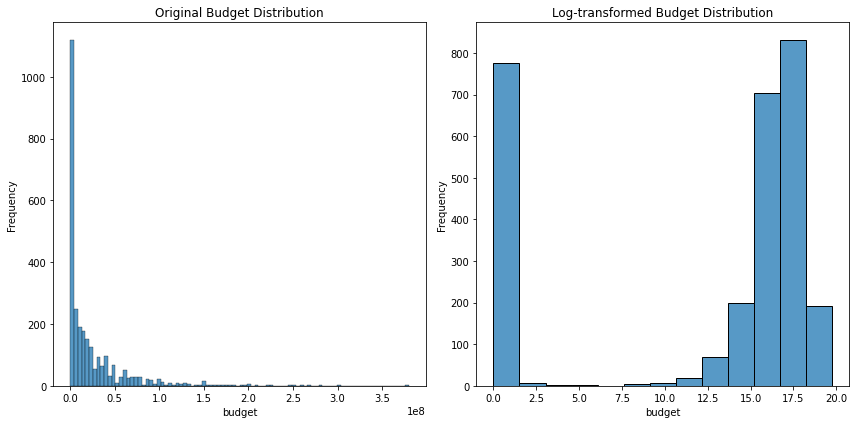

In [22]:
budget = data['budget']
# sns.distplot(budget).set_ylabel("Frequency")

log_budget = np.log1p(budget)
# sns.distplot(log_budget).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original budget distribution
sns.histplot(budget, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original Budget Distribution')

# Plot log-transformed budget distribution
sns.histplot(log_budget, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed Budget Distribution')

plt.tight_layout()
plt.show()

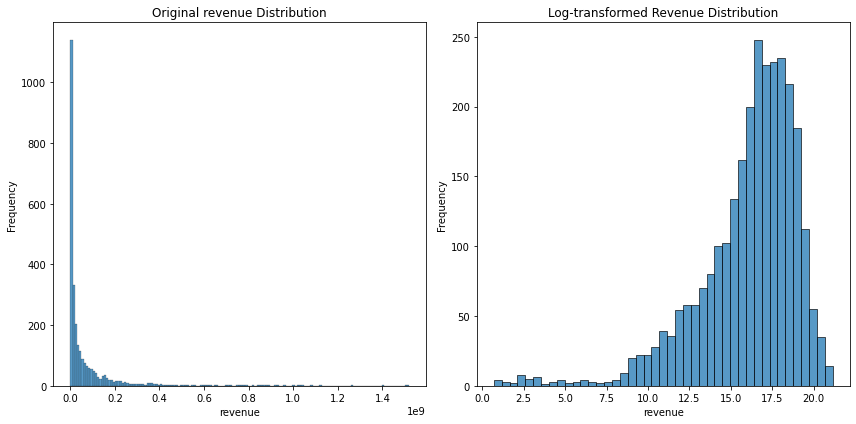

In [23]:
revenue = data['revenue']
# sns.distplot(revenue).set_ylabel("Frequency")

log_revenue = np.log1p(revenue)
# sns.distplot(log_revenue).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original revenue distribution
sns.histplot(revenue, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original revenue Distribution')

# Plot log-transformed revenue distribution
sns.histplot(log_revenue, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed Revenue Distribution')

plt.tight_layout()
plt.show()

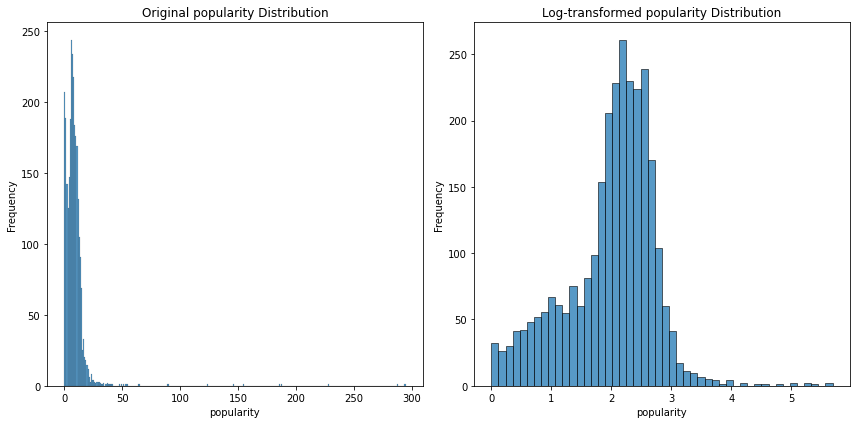

In [24]:
popularity = data['popularity']
# sns.distplot(popularity).set_ylabel("Frequency")

log_popularity = np.log1p(popularity)
# sns.distplot(log_popularity).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original popularity distribution
sns.histplot(popularity, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original popularity Distribution')

# Plot log-transformed popularity distribution
sns.histplot(log_popularity, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed popularity Distribution')

plt.tight_layout()
plt.show()

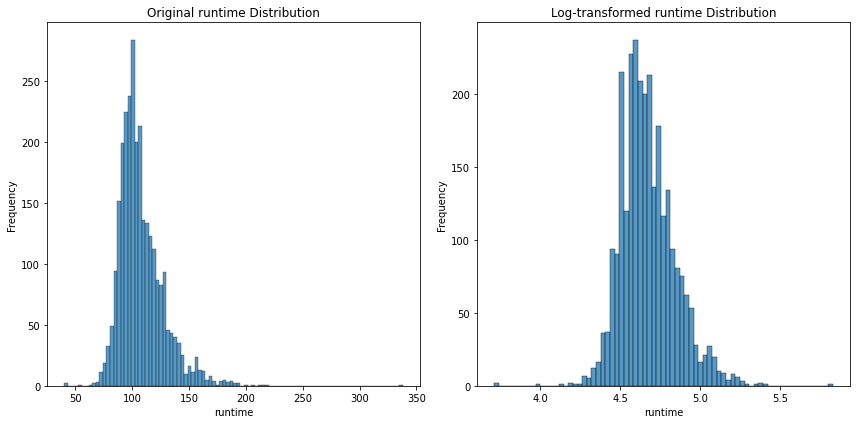

In [25]:
runtime = data['runtime']
# sns.distplot(runtime).set_ylabel("Frequency")

log_runtime = np.log1p(runtime)
# sns.distplot(log_runtime).set_ylabel("Frequency")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original runtime distribution
sns.histplot(runtime, ax=axes[0]).set_ylabel("Frequency")
axes[0].set_title('Original runtime Distribution')

# Plot log-transformed runtime distribution
sns.histplot(log_runtime, ax=axes[1]).set_ylabel("Frequency")
axes[1].set_title('Log-transformed runtime Distribution')

plt.tight_layout()
plt.show()

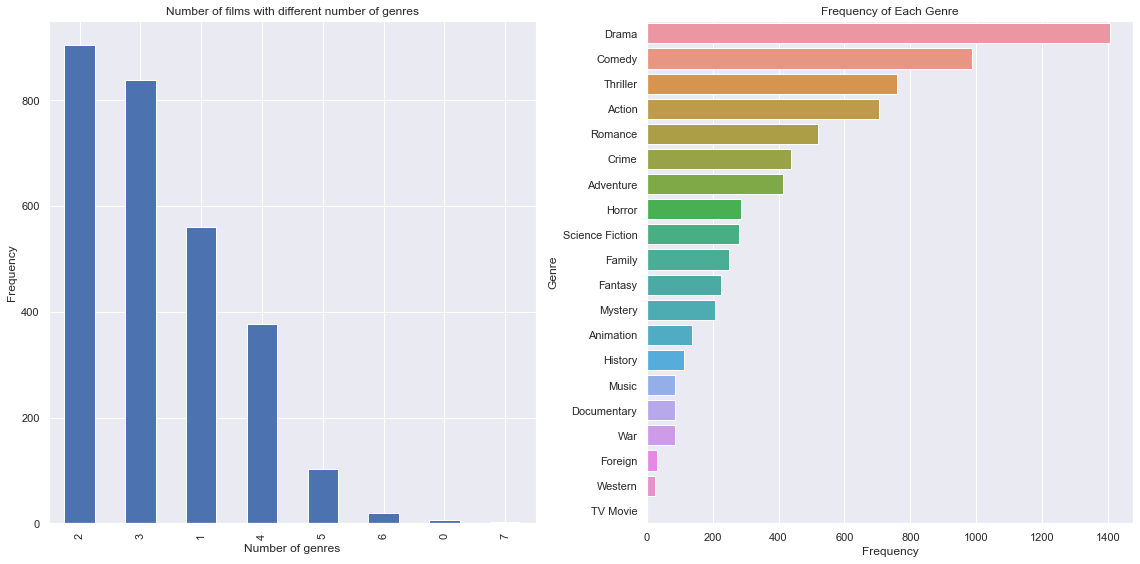

In [26]:
# Plotting genre
sns.set(rc={'figure.figsize':(16,8)})  # Adjusting figure size
plt.subplot(1, 2, 1)  # First subplot
data['num_genres'] = data['genres'].apply(lambda x: len(x))
data['num_genres'].value_counts().plot.bar()
plt.title("Number of films with different number of genres")
plt.xlabel("Number of genres")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)  # Second subplot
# Flatten the list of genres
all_genres = [genre for sublist in data['genres'] for genre in sublist]
# Create a countplot
sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index)
plt.title("Frequency of Each Genre")
plt.xlabel("Frequency")
plt.ylabel("Genre")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

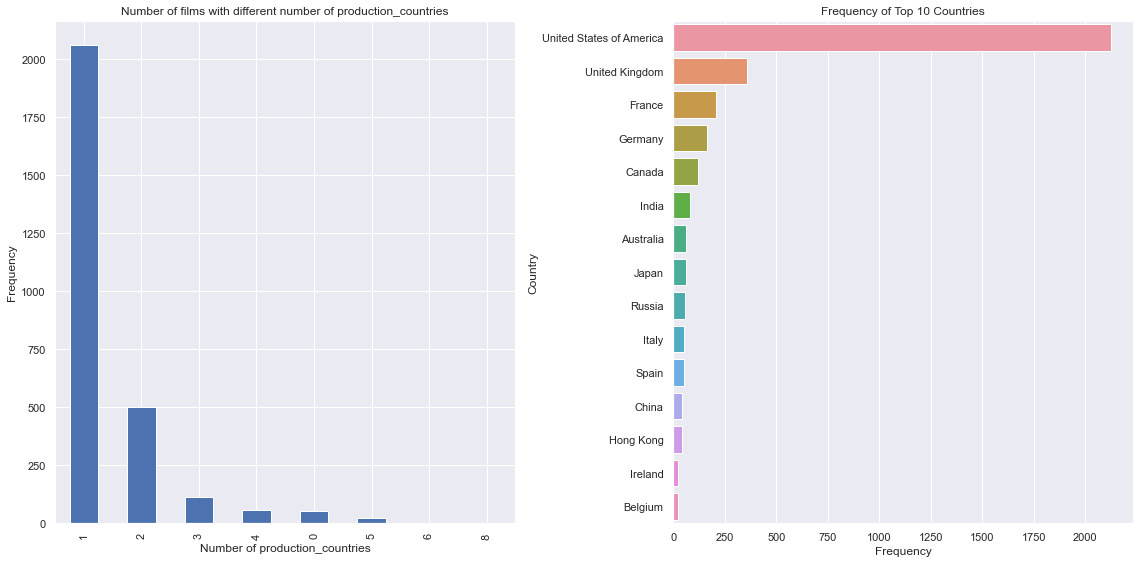

In [27]:
# Plotting num_of_production_countries
sns.set(rc={'figure.figsize':(16,8)})  # Adjusting figure size
plt.subplot(1, 2, 1)  # First subplot
data['num_of_production_countries'] = data['production_countries'].apply(lambda x: len(x))
data['num_of_production_countries'].value_counts().plot.bar()
plt.title("Number of films with different number of production_countries")
plt.xlabel("Number of production_countries")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)  # Second subplot
# Flatten the list of production_countries
all_production_countries = [country for sublist in data['production_countries'] for country in sublist]
# Get the top 10 countries
top_countries = pd.Series(all_production_countries).value_counts().nlargest(15).index
# Filter the data to include only the top 10 countries
top_countries_data = [country for country in all_production_countries if country in top_countries]
# Create a countplot
sns.countplot(y=top_countries_data, order=pd.Series(top_countries_data).value_counts().index)
plt.title("Frequency of Top 10 Countries")
plt.xlabel("Frequency")
plt.ylabel("Country")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

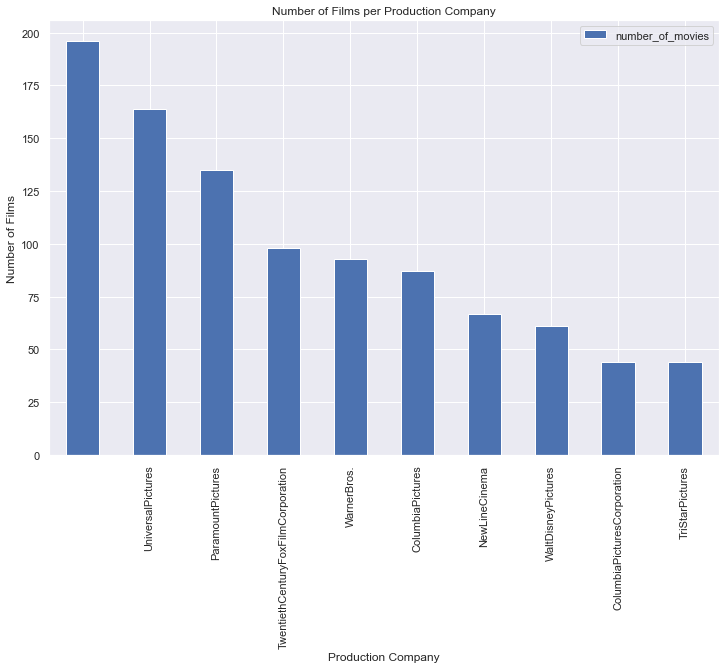

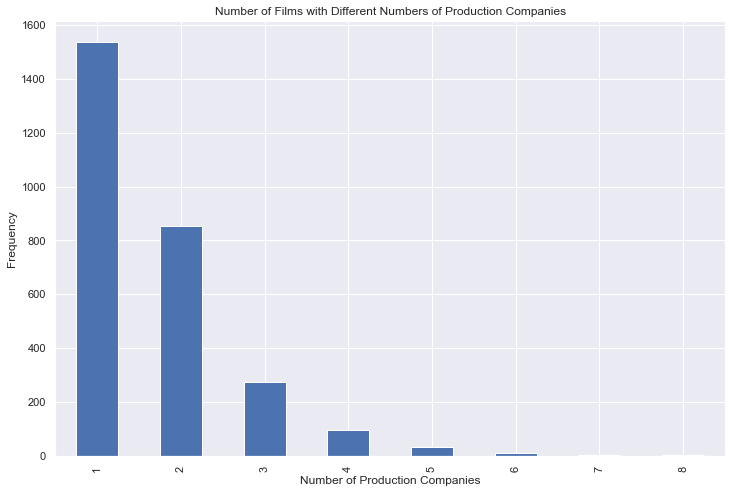

In [28]:
# Function to preprocess production companies
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

# Fill missing values in production_companies column
data["production_companies"] = data.production_companies.fillna('NoProductionCompany')

# Apply preprocessing function to production_companies column
data["production_companies_processed"] = data.production_companies.apply(lambda elem: production_companies_preprocessing(elem))

# Calculate the number of production companies for each movie
data['num_of_production_companies'] = data['production_companies_processed'].apply(lambda x: len(x))

# Calculate the number of movies per production company
production_companies_dict = dict()

for production_company in data["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1

# Plot the number of movies per production company
sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(10).plot.bar()
plt.title("Number of Films per Production Company")
plt.xlabel("Production Company")
plt.ylabel("Number of Films")

# Plot the frequency of different numbers of production companies
plt.figure()
sns.set(rc={'figure.figsize':(8,6)})
data['num_of_production_companies'].value_counts().sort_index().plot.bar()
plt.title("Number of Films with Different Numbers of Production Companies")
plt.xlabel("Number of Production Companies")
plt.ylabel("Frequency")

plt.show()

In [29]:
data

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,cast,crew,revenue,release_month,release_year,num_genres,num_of_production_countries,production_companies_processed,num_of_production_companies
imdb_id,,,,,,,,,,,,,,,,,,,
tt2637294,True,14000000,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,2015,1,1,"[ParamountPictures, Metro-Goldwyn-Mayer(MGM)]",2
tt0368933,True,40000000,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,2004,4,1,[WaltDisneyPictures],1
tt2582802,False,3300000,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,2014,1,1,"[BoldFilms, RightofWayFilms]",2
tt1821480,False,1200000,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,2012,2,1,[],1
tt1380152,False,0,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,2009,2,1,[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,4,1994,2,1,[WarnerBros.],1
tt2364975,False,0,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,3,2013,2,2,[MemfisFilm],1
tt0116908,False,65000000,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,10,1996,4,1,"[NewLineCinema, TheSteveTischCompany]",2


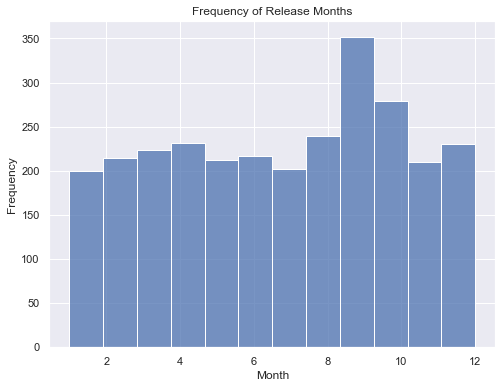

In [30]:
release_month = data['release_month']
sns.histplot(data['release_month'], bins=12, kde=False)
plt.title("Frequency of Release Months")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()



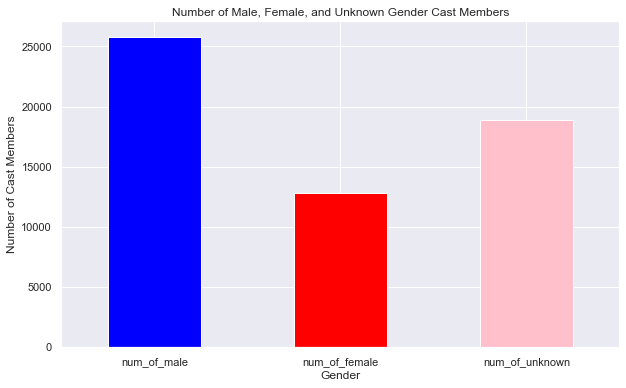

In [31]:
# Convert string representation of list to actual list of dictionaries
data['cast'] = data['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Count the number of each gender for each movie
data['num_of_male'] = data['cast'].apply(lambda x: sum(1 for member in x if member.get('gender') == 2))
data['num_of_female'] = data['cast'].apply(lambda x: sum(1 for member in x if member.get('gender') == 1))
data['num_of_unknown'] = data['cast'].apply(lambda x: sum(1 for member in x if member.get('gender') == 0))



male_cast_count = data['cast'].str.count("'gender': 2").sum()  # Assuming gender 2 represents male
female_cast_count = data['cast'].str.count("'gender': 1").sum()  # Assuming gender 1 represents female
zero_cast_count = data['cast'].str.count("'gender': 0").sum()  # Assuming gender 2 represents male


# Calculate the total number of movies
total_movies = len(data)

# Plotting
plt.figure(figsize=(10, 6))
data[['num_of_male', 'num_of_female', 'num_of_unknown']].sum().plot(kind='bar', color=['blue', 'red', 'pink'])
plt.title('Number of Male, Female, and Unknown Gender Cast Members')
plt.xlabel('Gender')
plt.ylabel('Number of Cast Members')
plt.xticks(rotation=0)
plt.show()

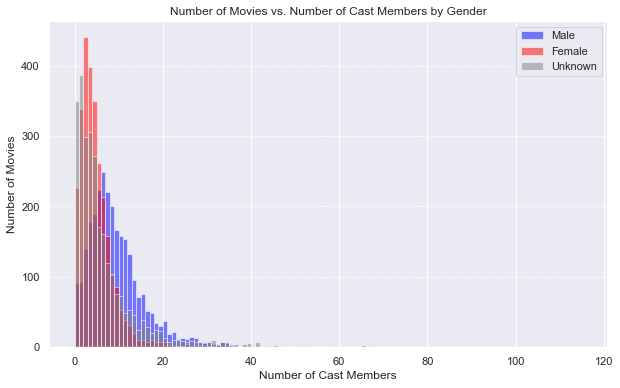

In [32]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting male cast members
plt.hist(data['num_of_male'], bins=np.arange(0, max(data['num_of_male']) + 2, 1), color='blue', alpha=0.5, label='Male')

# Plotting female cast members
plt.hist(data['num_of_female'], bins=np.arange(0, max(data['num_of_female']) + 2, 1), color='red', alpha=0.5, label='Female')

# Plotting unknown gender cast members
plt.hist(data['num_of_unknown'], bins=np.arange(0, max(data['num_of_unknown']) + 2, 1), color='gray', alpha=0.5, label='Unknown')

plt.title('Number of Movies vs. Number of Cast Members by Gender')
plt.xlabel('Number of Cast Members')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'Correlation between numerical features')

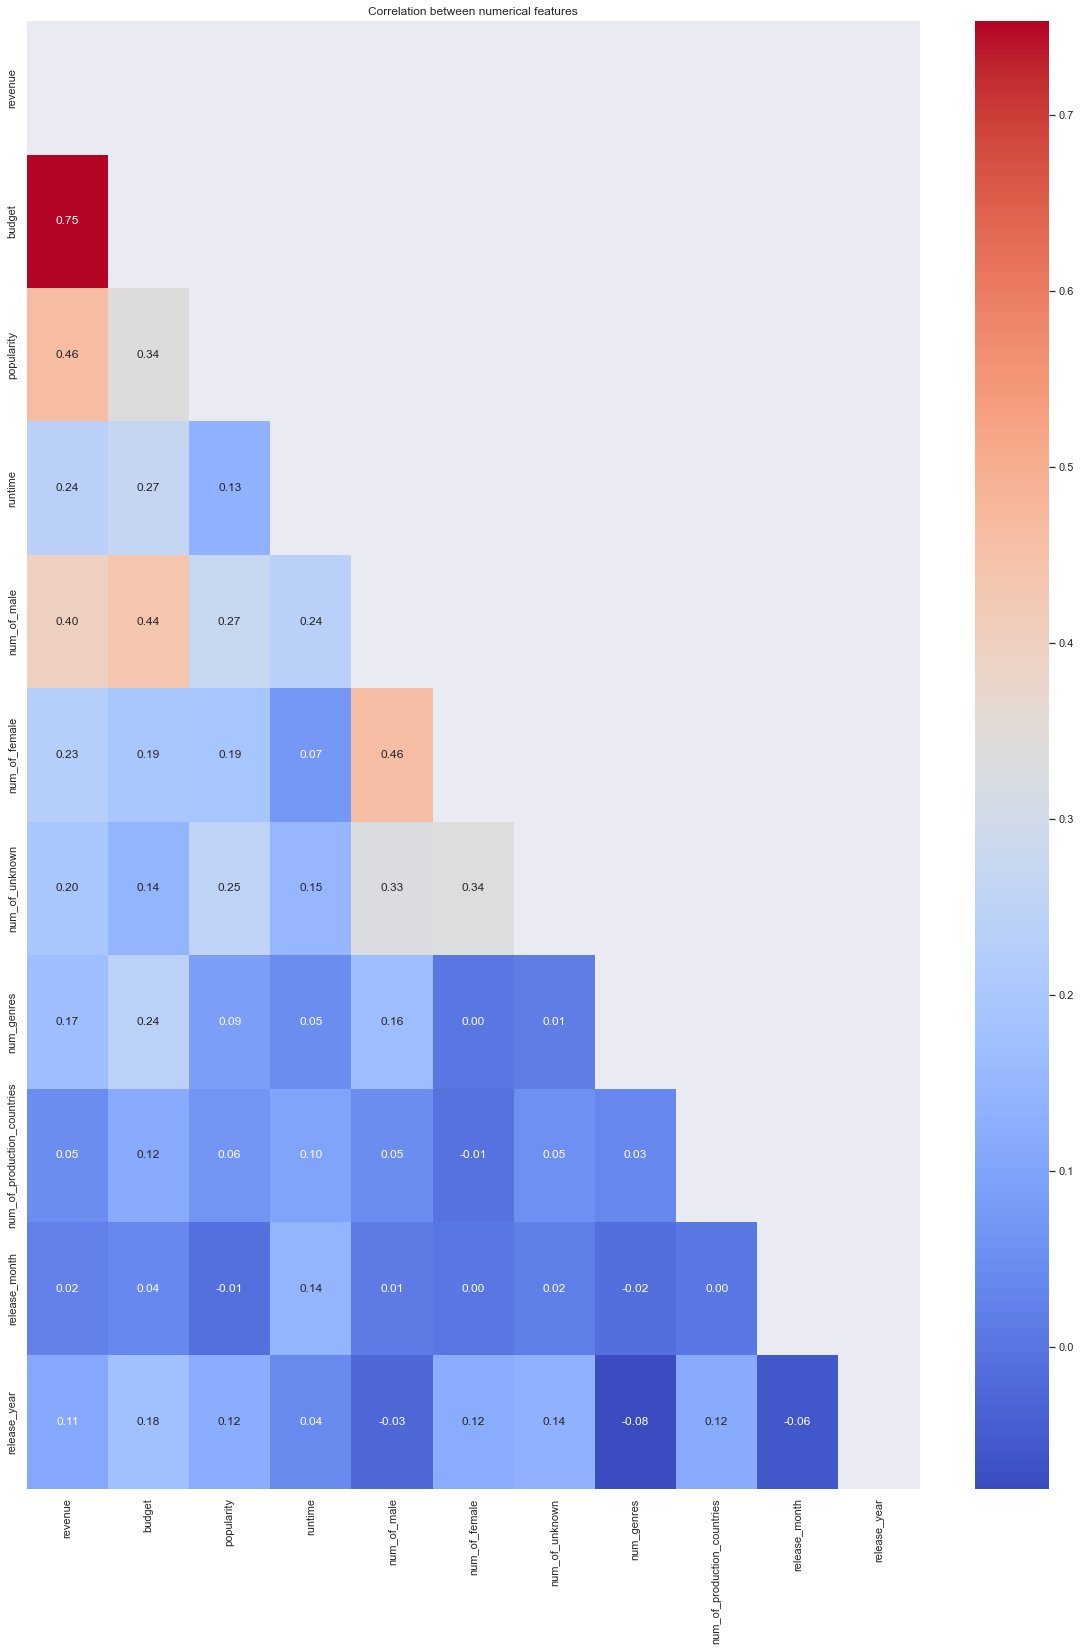

In [33]:
sns.set(rc={'figure.figsize':(20,27)})

# Compute the correlation matrix
corr = data[["revenue", "budget", "popularity", "runtime", "num_of_male",
                 "num_of_female", "num_of_unknown",
                 "num_genres", "num_of_production_countries", "release_month", "release_year"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

In [34]:
median = data.loc[data['budget'] > 0, 'budget'].median()
data["budget_processed"] = data["budget"].mask(data["budget"] == 0, median)
data.nsmallest(10, 'budget_processed')['budget_processed']

imdb_id
tt0376144     1.0
tt0374271     1.0
tt0120836     1.0
tt0110604     2.0
tt0077523     5.0
tt0144134     5.0
tt0183659     6.0
tt0475783     8.0
tt1913166    10.0
tt0118172    12.0
Name: budget_processed, dtype: float64

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


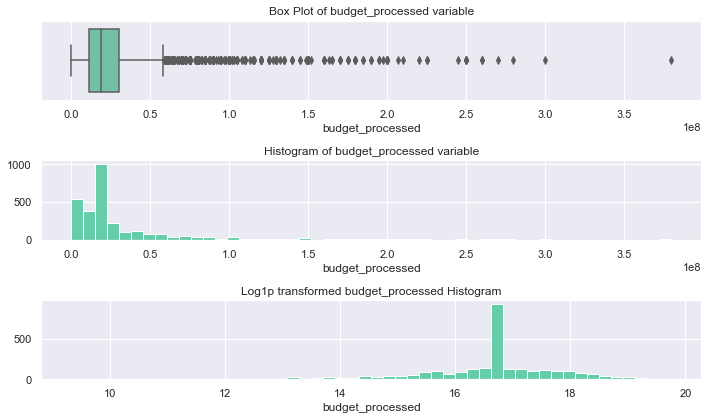

In [35]:
median = data.loc[data['budget'] >= 10000, 'budget'].median()
data["budget_processed"] = data["budget"].mask(data["budget"] < 10000, median)

# plot the data
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.budget_processed, ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of budget_processed variable")
sns.distplot(a=data.budget_processed, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of budget_processed variable")
sns.distplot(a=np.log1p(data.budget_processed), kde = False, ax = ax[2], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed budget_processed Histogram")
f.tight_layout()

Revenue of the row with maximum budget: 1045713802
Revenue of the row with maximum budget: 3923970
36.11518987341772
0.0
380000000
0


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


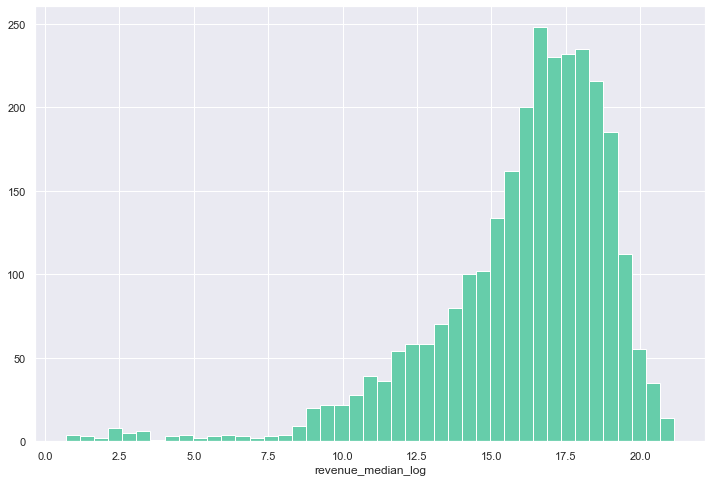

In [36]:
budget_below_10000 = data[data['budget'] < 10000]
mean_budget_below_10000 = budget_below_10000['budget'].mean() #23 million
median_budget_below_10000 = budget_below_10000['budget'].median()  #9 million
budget_max_value = data['budget'].max()  #380 million

max_budget_index = data['budget'].idxmax()

# Retrieve the revenue value corresponding to the row with the maximum budget value
revenue_of_max_budget = data.loc[max_budget_index, 'revenue']   # 1 billion (380 million budget)

print("Revenue of the row with maximum budget:", revenue_of_max_budget)

min_budget_index = data['budget'].idxmin()

# Retrieve the revenue value corresponding to the row with the maximum budget value
revenue_of_min_budget = data.loc[min_budget_index, 'revenue']   # 3 million (0 budget)

print("Revenue of the row with maximum budget:", revenue_of_min_budget)

# mean budget
mean_budget = data[data['budget'] != 0]['budget'].mean()

# Replace zero budget values with the mean
data['budget_mean'] = data['budget'].replace(0, mean_budget)
data['budget_mean_log'] = np.log1p(data['budget_mean'])


# mean revenue
mean_revenue = data[data['revenue'] != 0]['revenue'].mean()

# Replace zero revenue values with the mean
data['revenue_mean'] = data['revenue'].replace(0, mean_revenue)
data['revenue_mean_log'] = np.log1p(data['revenue_mean'])


# median budget
median_budget = data[data['budget'] != 0]['budget'].median()

# Replace zero budget values with the median
data['budget_median'] = data['budget'].replace(0, median_budget)
data['budget_median_log'] = np.log1p(data['budget_median'])

# median revenue
median_revenue = data[data['revenue'] != 0]['revenue'].median()

# Replace zero revenue values with the median
data['revenue_median'] = data['revenue'].replace(0, median_revenue)
data['revenue_median_log'] = np.log1p(data['revenue_median'])

data['revenue_log'] = np.log1p(data['revenue'])
sns.distplot(a=data.revenue_median_log, kde = False, color='mediumaquamarine', hist_kws=dict(alpha=1))

print(mean_budget_below_10000)
print(median_budget_below_10000)  
print(data['budget'].max())
print(data['budget'].min())


In [37]:
# Linear Regression Model
# Prepare the data
X_lr = data[['budget_median', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
y_lr = data['revenue_log']

# Train-Test Split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Model Evaluation
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluate the model
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print("Linear Regression Model Metrics:")
print("Mean Squared Error (MSE):", mse_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("R-squared (R2) Score:", r2_lr)

Linear Regression Model Metrics:
Mean Squared Error (MSE): 7.396140158260072
Mean Absolute Error (MAE): 1.890903804614866
R-squared (R2) Score: 0.2901330849536288


In [38]:
# Random forest 
X_rfb = data[['budget', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
y_rfb = data['revenue']

# Train-Test Split
X_train_rfb, X_test_rfb, y_train_rfb, y_test_rfb = train_test_split(X_rfb, y_rfb, test_size=0.2, random_state=42)

# Model Training
rf_model_rfb = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rfb.fit(X_train_rfb, y_train_rfb)

# Model Evaluation
y_pred_rfb = rf_model_rfb.predict(X_test_rfb)

# Evaluate the model
mse_rfb = mean_squared_error(y_test_rfb, y_pred_rfb)
mae_rfb = mean_absolute_error(y_test_rfb, y_pred_rfb)
r2_rfb = r2_score(y_test_rfb, y_pred_rfb)

print("Random Forest Model Metrics:")
print("Mean Squared Error (MSE):", mse_rfb)
print("Mean Absolute Error (MAE):", mae_rfb)
print("R-squared (R2) Score:", r2_rfb)

Random Forest Model Metrics:
Mean Squared Error (MSE): 8609910843421887.0
Mean Absolute Error (MAE): 46465651.68538189
R-squared (R2) Score: 0.6340846554793576


In [39]:
# Gradient Boosting algorithm with processed budget
X_gbpb = data[['budget_median', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_companies', 'num_of_production_countries', 'release_month', 'release_year']]
y_gbpb = data['revenue_log']

# Train-Test Split
X_train_gbpb, X_test_gbpb, y_train_gbpb, y_test_gbpb = train_test_split(X_gbpb, y_gbpb, test_size=0.2, random_state=42)

# Model Training
gb_model_gbpb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_gbpb.fit(X_train_gbpb, y_train_gbpb)

# Model Evaluation
y_pred_gbpb = gb_model_gbpb.predict(X_test_gbpb)

# Evaluate the model
mse_gbpb = mean_squared_error(y_test_gbpb, y_pred_gbpb)
mae_gbpb = mean_absolute_error(y_test_gbpb, y_pred_gbpb)
r2_gbpb = r2_score(y_test_gbpb, y_pred_gbpb)

print("Gradient Boosting Model Metrics:")
print("Mean Squared Error (MSE):", mse_gbpb)
print("Mean Absolute Error (MAE):", mae_gbpb)
print("R-squared (R2) Score:", r2_gbpb)

Gradient Boosting Model Metrics:
Mean Squared Error (MSE): 4.865946618687879
Mean Absolute Error (MAE): 1.4342748636349947
R-squared (R2) Score: 0.5329760603399822


In [40]:
# XGBoost regression with processed budget
X_xgbpb = data[['budget_median', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_companies', 'num_of_production_countries', 'release_month', 'release_year']]
y_xgbpb = data['revenue_log']

# Train-Test Split
X_train_xgbpb, X_test_xgbpb, y_train_xgbpb, y_test_xgbpb = train_test_split(X_xgbpb, y_xgbpb, test_size=0.2, random_state=42)

# Model Training
xgb_model_xgbpb = xgb.XGBRegressor(random_state=42)
xgb_model_xgbpb.fit(X_train_xgbpb, y_train_xgbpb)

# Model Evaluation
y_pred_xgbpb = xgb_model_xgbpb.predict(X_test_xgbpb)

# Evaluate the model
mse_xgbpb = mean_squared_error(y_test_xgbpb, y_pred_xgbpb)
mae_xgbpb = mean_absolute_error(y_test_xgbpb, y_pred_xgbpb)
r2_xgbpb = r2_score(y_test_xgbpb, y_pred_xgbpb)

print("XGBoost Model Metrics:")
print("Mean Squared Error (MSE):", mse_xgbpb)
print("Mean Absolute Error (MAE):", mae_xgbpb)
print("R-squared (R2) Score:", r2_xgbpb)


XGBoost Model Metrics:
Mean Squared Error (MSE): 5.259620112695769
Mean Absolute Error (MAE): 1.5343269840019156
R-squared (R2) Score: 0.4951920564207476


In [41]:
# # Random forest algorithm with processsed budget
X_rfpb = data[['budget_median', 'popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
y_rfpb = data['revenue_log']

# Train-Test Split
X_train_rfpb, X_test_rfpb, y_train_rfpb, y_test_rfpb = train_test_split(X_rfpb, y_rfpb, test_size=0.2, random_state=42)

# Model Training
rfpbmodel_rfpb = RandomForestRegressor(n_estimators=100, random_state=42)
rfpbmodel_rfpb.fit(X_train_rfpb, y_train_rfpb)

# Model Evaluation
y_pred_rfpb = rfpbmodel_rfpb.predict(X_test_rfpb)

# Evaluate the model
mse_rfpb = mean_squared_error(y_test_rfpb, y_pred_rfpb)
mae_rfpb = mean_absolute_error(y_test_rfpb, y_pred_rfpb)
r2_rfpb = r2_score(y_test_rfpb, y_pred_rfpb)


print("Random Forest Model Metrics with processsed budget:")
print("Mean Squared Error (MSE):", mse_rfpb)
print("Mean Absolute Error (MAE):", mae_rfpb)
print("R-squared (R2) Score:", r2_rfpb)

Random Forest Model Metrics with processsed budget:
Mean Squared Error (MSE): 4.883865015168485
Mean Absolute Error (MAE): 1.4348024304243825
R-squared (R2) Score: 0.5312562880587526


In [59]:
# Create 'sucess_meter' as 'revenue' minus 'budget' (we fit the model to the training data)
data['sucess_meter'] = data['revenue_log'] - data['budget_median_log']
# data


# Define a function to categorize movies based on sucess (we fit the model to the training data)
def categorize_movie(profit):
    if profit > 3:
        return 'Super Duper Hit'
    elif 2 < profit <= 3:
        return 'Super Hit'
    elif 0 < profit <= 2:
        return 'Average'
    elif profit <= 0:
        return 'Flop'

# Apply the function to create a new column
data['movie_category'] = data['sucess_meter'].apply(categorize_movie)
data


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,status,title,...,budget_mean_log,revenue_mean,revenue_mean_log,budget_median,budget_median_log,revenue_median,revenue_median_log,revenue_log,sucess_meter,movie_category
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt2637294,True,14000000,[Comedy],English,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,Released,Hot Tub Time Machine 2,...,16.454568,12314651,16.326300,14000000,16.454568,12314651,16.326300,16.326300,-0.128268,Flop
tt0368933,True,40000000,"[Comedy, Drama, Family, Romance]",English,8.248895,[Walt Disney Pictures],[United States of America],113.0,Released,The Princess Diaries 2: Royal Engagement,...,17.504390,95149435,18.370959,40000000,17.504390,95149435,18.370959,18.370959,0.866569,Average
tt2582802,False,3300000,[Drama],English,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,Released,Whiplash,...,15.009433,13092000,16.387512,3300000,15.009433,13092000,16.387512,16.387512,1.378079,Average
tt1821480,False,1200000,"[Thriller, Drama]",Hindi,3.174936,[],[India],122.0,Released,Kahaani,...,13.997833,16000000,16.588099,1200000,13.997833,16000000,16.588099,16.588099,2.590266,Super Hit
tt1380152,False,0,"[Action, Thriller]",Korean,1.148070,[],[South Korea],118.0,Released,Marine Boy,...,17.306130,3923970,15.182615,19000000,16.759950,3923970,15.182615,15.182615,-1.577335,Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0109403,False,0,"[Comedy, Romance]",English,9.853270,"[Warner Bros., Morgan Creek Productions]",[United States of America],102.0,Released,Chasers,...,17.306130,1596687,14.283442,19000000,16.759950,1596687,14.283442,14.283442,-2.476508,Flop
tt2364975,False,0,"[Drama, Music]",Swedish,3.727996,"[Memfis Film, Film i Väst]","[Denmark, Sweden]",102.0,Released,We Are the Best!,...,17.306130,180590,12.103990,19000000,16.759950,180590,12.103990,12.103990,-4.655960,Flop
tt0116908,False,65000000,"[Crime, Action, Mystery, Thriller]",English,14.482345,"[New Line Cinema, Forge, The Steve Tisch Company]",[United States of America],120.0,Released,The Long Kiss Goodnight,...,17.989898,89456761,18.309266,65000000,17.989898,89456761,18.309266,18.309266,0.319368,Average


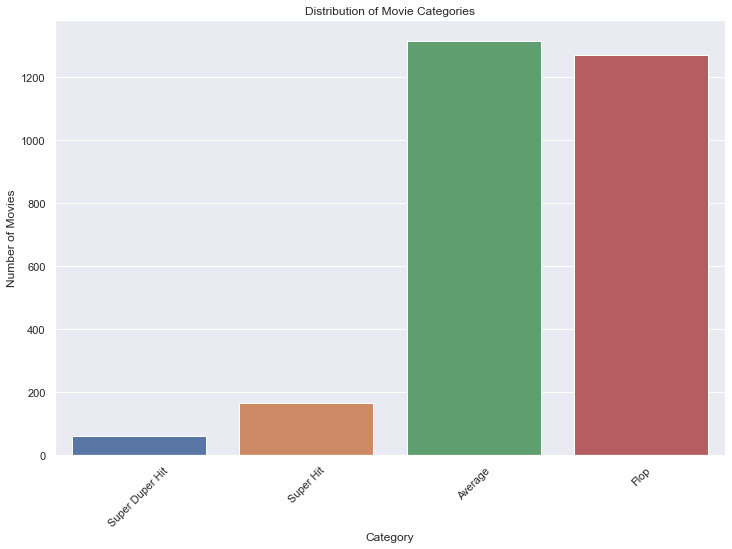

In [60]:
# Plot the distribution of movie categories
sns.countplot(data=data, x='movie_category', order=['Super Duper Hit', 'Super Hit', 'Average', 'Flop'])
plt.title('Distribution of Movie Categories')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [43]:
# keep this in slide

# #imputing the zero values in budget by predicting the budget values (we make predictions with the model)

# # Filter rows with zero budget
# zero_budget_data = data[data['budget'] == 0]
# zero_budget_data

# # Non-zero budget data
# non_zero_budget_data = data[data['budget'] != 0]

# # Prepare the data for model training
# X_train = non_zero_budget_data[['popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']]
# y_train = non_zero_budget_data['budget']

# # Train a linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train) (we fit the model to the training data)

# # Use the trained model to predict budget for rows with zero values (we make predictions with the model)
# X_predict = zero_budget_data[['popularity', 'runtime', 'num_of_male', 'num_of_female', 'num_of_unknown', 'num_genres', 'num_of_production_countries', 'release_month', 'release_year']] (we make predictions with the model)
# predicted_budget = model.predict(X_predict) (we make predictions with the model)

# # Replace zero budget values with predicted values (we make predictions with the model)
# data.loc[data['
# '] == 0, 'budget'] = predicted_budget (we make predictions with the model)

# # Now the 'budget' column should no longer contain zero values

In [44]:
# #original language
# train_df.original_language.value_counts()[:10].plot.bar()
# plt.title("Number of films per language")

In [45]:
# # Production Companies
# def production_companies_preprocessing(elem):
# string = str(elem)
# str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
# ll = str1.split(",")[0::2]
# return ll

# train_df["production_companies"] = train_df.production_companies.fillna('NoProductionCompany')
# train_df["production_companies"] = test_df.production_companies.fillna('NoProductionCompany')

# train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))
# test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))



# production_companies_dict = dict()

# for production_company in train_df["production_companies_processed"]:
# for elem in production_company:
# if elem not in production_companies_dict:
# production_companies_dict[elem] = 1
# else:
# production_companies_dict[elem] += 1


# sns.set(rc={'figure.figsize':(12,8)})
# production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
# production_companies_df.columns = ["number_of_movies"]
# production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
# production_companies_df.head(10).plot.bar()
# plt.title("Number of films per production company")

In [46]:
# # production_countries
# def production_countries_preprocessing(elem):
# string = str(elem)
# str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
# ll = str1.split(",")[0::2]
# return ll

# train_df["production_countries_processed"] = train_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))
# test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))


# production_countries_dict = dict()

# for production_country in train_df["production_countries_processed"]:
# for elem in production_country:
# if elem not in production_countries_dict:
# production_countries_dict[elem] = 1
# else:
# production_countries_dict[elem] += 1



# production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
# production_countries_df.columns = ["number_of_movies"]
# production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
# production_countries_df.head(10).plot.bar()
# plt.title("Number of films per production country")

In [47]:
# # Month of Release, which month have most of the releases
# sns.set(rc={'figure.figsize':(12,8)})
# train_df.month.value_counts().plot.bar()
# plt.title('Number of films per month')

In [48]:
# # Bivariate Analysis between each genre and revenue
# for we, g in enumerate(genres_df.index.values):
# genres_df.loc[g, "median_salary"] = train_df[train_df['isGenre_' + g]==1].revenue.median()

# genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

In [49]:
# # number_of_movies median_salary
# for we, c in enumerate(production_countries_df.index.values):
# production_countries_df.loc[c, "median_salary"] = train_df[train_df['isProductionCountry_' + c]==1].revenue.median()

# production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)